In [32]:
import numpy as np

class BernoulliBandit :
    def __init__(self, K) :
        self.probs = np.random.uniform(size=K)
        self.K = K
        self.best_idx = np.argmax(self.probs)
        self.best_prob = self.probs[self.best_idx]
        
    def step(self, k:int) :
        if np.random.rand() < self.probs[k] :
            return 1
        return 0
    def status(self) :
        print(self.probs, self.K, self.best_prob, self.best_idx)

bb = BernoulliBandit(10)
reward = bb.step(int(2))
print(reward)
bb.status()

0
[0.10997006 0.76740151 0.54411109 0.53583412 0.74998949 0.64063403
 0.94221032 0.59178459 0.88167175 0.25732901] 10 0.942210318961441 6


In [75]:
class Solver :
    def __init__(self, bandit) :
        self.bandit = bandit
        self.counter = [0 for i in range(bandit.K)]
        self.regrets = [] #[0 for i in range(bandit.K)] 是懊悔记录，不是每个臂的懊悔，别跟reward混淆
        self.regret = 0
    def run_one_step(self) :
        # choose one bandit and return
        return np.random.randint(0, self.bandit.K)

    def update_regret(self, k) :
        # 每次的懊悔累积,记录下来。相当于是懊悔的定积分。
        self.regret += self.bandit.best_prob - self.bandit.probs[k] 
        self.regrets.append(self.regret)
    
    def run(self, max_step) :
        for i in range(max_step) :
            k = self.run_one_step()
            self.counter[k] += 1
            self.update_regret(k)
            
    def status(self) :
        print("counter:", self.counter)
        print("regrets:", self.regrets)
s = Solver(bb)
s.run(10)
s.status()

counter: [0, 1, 1, 2, 0, 0, 3, 2, 1, 0]
regrets: [0.3980992242010457, 0.7485249573491267, 0.7485249573491267, 0.9233337615933469, 1.273759494741428, 1.680135689710336, 1.680135689710336, 2.0865118846792443, 2.0865118846792443, 2.1470504581787693]


In [63]:
class EpsilonGreedy(Solver) :
    def __init__(self, bandit, epsilon=0.01) :
        super().__init__(bandit)
        self.epsilon = epsilon
        self.estimates = [1.0 for i in range(0, self.bandit.K)]

    def run_one_step(self) :
        if np.random.rand() < self.epsilon :
            k = np.random.randint(0, self.bandit.K)
        else :
            k = np.argmax(self.estimates)
        r = self.bandit.step(k)
        self.counter[k] += 1
        self.estimates[k] += ((r - self.estimates[k]) / (self.counter[k] + 1))
        return k

In [55]:
import matplotlib.pyplot as plt

def plot_results(solvers, solver_names):
    """生成累积懊悔随时间变化的图像。输入solvers是一个列表,列表中的每个元素是一种特定的策略。
    而solver_names也是一个列表,存储每个策略的名称"""
    for idx, solver in enumerate(solvers):
        time_list = range(len(solver.regrets))
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    plt.xlabel('Time steps')
    plt.ylabel('Cumulative regrets')
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    plt.legend()
    plt.show()

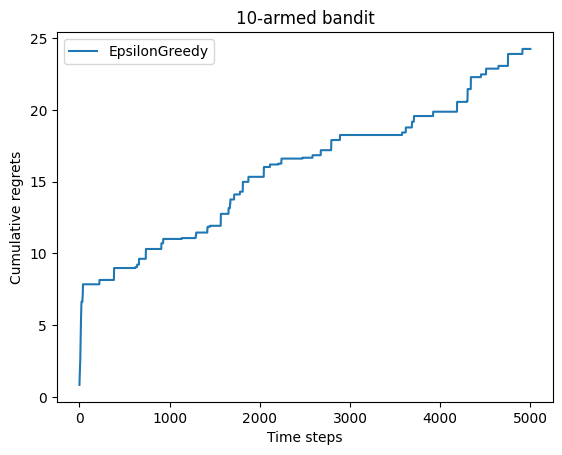

In [76]:
np.random.seed(1)
eg = EpsilonGreedy(bb, 0.01)
eg.run(5000)
plot_results([eg], ['EpsilonGreedy'])